In [2]:
!pip3 install scikit-learn==0.14.1
!pip3 install -U imbalanced-learn
!pip3 install six
import six
import sys
sys.modules['sklearn.externals.six'] = six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.5 MB/s 
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn ... error
  Rolling back uninstall of scikit-learn
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn-1.0.2.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn.libs
  Moving to /usr/local/lib/python3.7/dist-packages/sklearn/
   from /usr/local/lib/python3.7/dist-packages/~klearn
ERROR: Command errored out with exit status 1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import collections, joblib
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
def normalize_scale(X):
  scaler = MinMaxScaler()
  scaler.fit(X)
  X_scaled = scaler.transform(X)
  return X_scaled

In [5]:
data = pd.read_csv('/content/datase.csv')
columns = ['order_id', 'store_id', 'to_user_distance', 'to_user_elevation', 'total_earning', 'created_at', 'taken']
df = pd.DataFrame(data, columns=columns)
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce').astype('datetime64').astype(int).astype(float)
# df = df.drop("created_at",1)
# df = df.drop("order_id",1)
X = df.drop("taken",1).values   #Feature Matrix
y = df["taken"].values      
X_scaled = normalize_scale(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


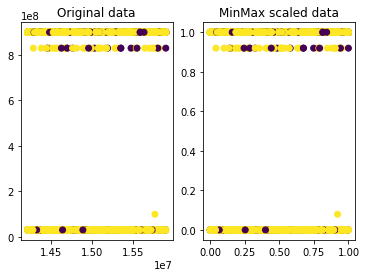

In [6]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_title("Original data")
axes[1].scatter(X_scaled[:,0], X_scaled[:,1], c=y)
axes[1].set_title("MinMax scaled data")
plt.show()

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.27, random_state=27)

In [8]:
# nm = NearMiss()
# x_nm, y_nm = nm.fit_resample(X_scaled, y)
x_sm, y_sm = SMOTE(sampling_strategy=0.5).fit_resample(X_train, y_train)
x_rus, y_rus = RandomUnderSampler(sampling_strategy=0.7).fit_resample(x_sm, y_sm)
print('Original dataset shape:', collections.Counter(y))
print('Resample dataset shape:', collections.Counter(y_rus))

Original dataset shape: Counter({1: 108276, 0: 9313})
Resample dataset shape: Counter({1: 56454, 0: 39518})


In [9]:
print('Original dataset shape:', collections.Counter(y))
print('Resample dataset shape:', collections.Counter(y_sm))

Original dataset shape: Counter({1: 108276, 0: 9313})
Resample dataset shape: Counter({1: 79037, 0: 39518})


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.27, random_state=27)

In [11]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
print('Confusion matrix:', confusion_matrix(rfc_predict, y_test))

ROCAUC score: 0.8808602628530945
Accuracy score: 0.8849998070466562
F1 score: 0.9028683181225554
Confusion matrix: [[ 9083  1480]
 [ 1500 13850]]


In [12]:
joblib.dump(rfc, 'order_taken.pkl')

['order_taken.pkl']

In [13]:
predictions = rfc.predict(X_val)# check performance
print('ROCAUC score:',roc_auc_score(y_val, predictions))
print('Accuracy score:',accuracy_score(y_val, predictions))
print('F1 score:',f1_score(y_val, predictions))
print('Confusion matrix:', confusion_matrix(predictions, y_val))

ROCAUC score: 0.5973727637112121
Accuracy score: 0.8571968503937007
F1 score: 0.9211697614576814
Confusion matrix: [[  725  2748]
 [ 1786 26491]]


# Test

In [18]:
data_test = pd.read_csv('/content/orders_test.csv')
columns = ['order_id', 'store_id', 'to_user_distance', 'to_user_elevation', 'total_earning', 'created_at', 'taken']
df_test = pd.DataFrame(data_test, columns=columns)
df_test['created_at'] = pd.to_datetime(df_test['created_at'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce').astype('datetime64').astype(int).astype(float)
# df = df.drop("created_at",1)
# df = df.drop("order_id",1)
X_test = df_test.drop("taken",1).values   #Feature Matrix
# y_test = df_test["taken"].values      
X_scaled_test = normalize_scale(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


29398

In [20]:
predictions_test = rfc.predict(X_scaled_test)# check performance
print(predictions_test.tolist())

[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 